# Manifold Learning

* While PCA is flexible, fast, and easily interpretable, it does not perform so well when there are nonlinear relationships within the data.
* To address this deficiency, we can turn to manifold learning algorithms:
    * Manifold Learning Algorithms :
        * Class of unsupervised estimators that seek to describe dataset as low-dimensional manifolds embedded in high-dimensional spaces.

# A. Manifold Learning Sample


In [4]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

In [5]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)

    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

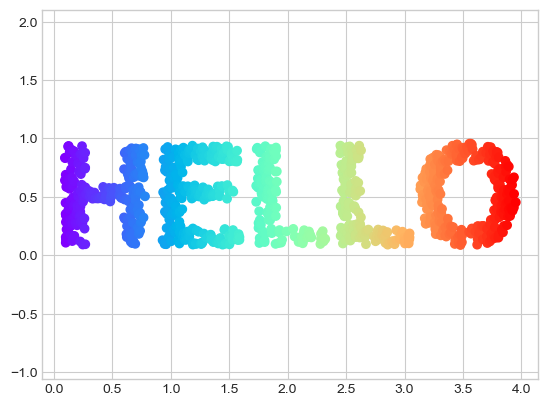

In [6]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=mpl.colormaps['rainbow'])
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

# B. Multidimensional Scaling:

* If we use a rotation matrix to rotate the data, the x and y values change, but the data is still fundamentally the same.
    * This confirms that the x and y values are not necessarily fundamental to the relationships in the data.
    * What is fundamental, in this case, is the distance between each point within the dataset.
    * A common way to represent this is to use a distance matrix: 
        * For $N$ points, we construct an $N × N$ array such that entry $(i, j)$ contains the distance between point $i$ and point $j$.
        * This can be done using sklearn's `pairwise_distances`.

* While computing this distance matrix from $(x, y)$ coordinates is straight-forward, transforming the distances back into $x$ and $y$ coordinates is rather difficult:
    * This is exactly what the multidimensional scaling algorithm aims to do:
        * Given a distance matrix between points, it recovers a D-dimensional coordinate representation of the data.
        * The MDS algorithm recovers one of the possible two-dimensional coordinate representations of our data, using only the N × N distance matrix describing the relationship between the data points.

In [12]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    
    return np.dot(X, R)

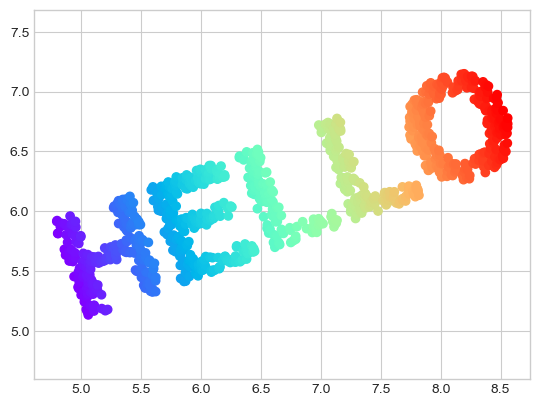

In [13]:
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

In [14]:
from sklearn.metrics import pairwise_distances

D = pairwise_distances(X)
D.shape

(1000, 1000)

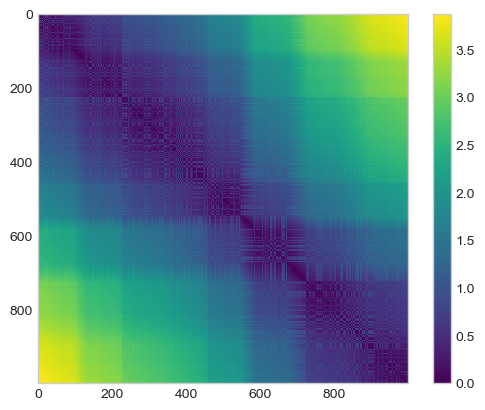

In [15]:
plt.imshow(D, zorder=2, cmap='viridis', interpolation='nearest')
plt.colorbar();

In [16]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

c:\Users\JCA\anaconda3\envs\ds_ml_dl\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


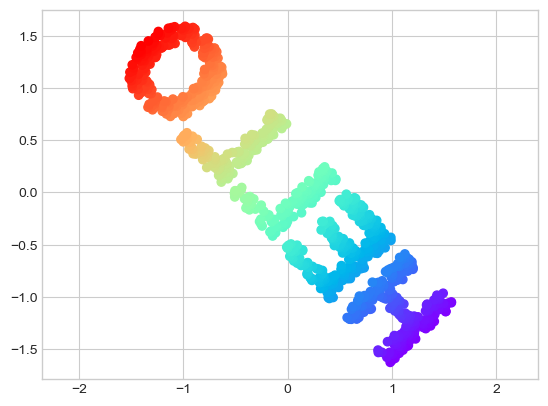

In [17]:
from sklearn.manifold import MDS

model = MDS(n_components=2, dissimilarity='precomputed', random_state=1701)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

### B.1. MDS as Manifold Learning: